<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DATA-SET:-Chicago's-Food-Inspection" data-toc-modified-id="DATA-SET:-Chicago's-Food-Inspection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA SET: Chicago's Food Inspection</a></span></li><li><span><a href="#Data-Overview" data-toc-modified-id="Data-Overview-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Overview</a></span></li><li><span><a href="#Treatment-of-the-data" data-toc-modified-id="Treatment-of-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Treatment of the data</a></span><ul class="toc-item"><li><span><a href="#inspection_id" data-toc-modified-id="inspection_id-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>inspection_id</a></span></li><li><span><a href="#DBA-name" data-toc-modified-id="DBA-name-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>DBA name</a></span></li><li><span><a href="#AKA-Name" data-toc-modified-id="AKA-Name-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>AKA Name</a></span></li><li><span><a href="#License-Number" data-toc-modified-id="License-Number-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>License Number</a></span></li><li><span><a href="#Facility-Type" data-toc-modified-id="Facility-Type-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Facility Type</a></span></li><li><span><a href="#Risk" data-toc-modified-id="Risk-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Risk</a></span></li><li><span><a href="#Address" data-toc-modified-id="Address-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Address</a></span></li><li><span><a href="#City" data-toc-modified-id="City-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>City</a></span></li><li><span><a href="#State" data-toc-modified-id="State-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>State</a></span></li><li><span><a href="#Location" data-toc-modified-id="Location-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Location</a></span></li><li><span><a href="#Inspection-type" data-toc-modified-id="Inspection-type-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Inspection type</a></span></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Missing-Data" data-toc-modified-id="Missing-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Missing Data</a></span></li><li><span><a href="#Inspections-by-type--of-business" data-toc-modified-id="Inspections-by-type--of-business-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Inspections by type  of business</a></span></li><li><span><a href="#Relationship-between-columns" data-toc-modified-id="Relationship-between-columns-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Relationship between columns</a></span></li><li><span><a href="#Where-are-the-inspections-located?" data-toc-modified-id="Where-are-the-inspections-located?-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Where are the inspections located?</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import pickle 
from matplotlib import pyplot as plt
import warnings
from pyjarowinkler import distance
import geopandas as gpd
import folium
import seaborn as sns
import pgeocode
warnings.filterwarnings("ignore")

# DATA SET: Chicago's Food Inspection

Chicago's Food Inspection Dataset is derived from a larger initiative from the local authorities of Chicago to make Government's data publicly available to everyone. Other similar datasets are available at https://data.cityofchicago.org

This dataset, in particular, is generated from inspections of restaurants and other food establishments in Chicago from January 1, 2010, to the present. Inspections are performed by staff from the Chicago Department of Public Health’s Food Protection Program using a standardized procedure. The results of the inspection are inputted into a database, then reviewed and approved by a State of Illinois Licensed Environmental Health Practitioner (LEHP).

- __Data Owner__: Chicago Department of Public Health
- __Time Period__: 2010 - Present
- __Frequency__: This database was updated with information from new inspections each Friday.


# Data Overview

First of all, we are going to understand the dataset and its content. Initial analyis on the food-inspections dataset in Chicago follows below:

In [4]:
chicago_df = pd.read_csv('./data/food-inspections.csv', delimiter=',')
chicago_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Results,Violations,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,2320830,"THE HOXTON, CHICAGO","THE HOXTON, CHICAGO",2694640.0,Restaurant,Risk 2 (Medium),200 N GREEN ST,CHICAGO,IL,60607.0,...,Pass,36. THERMOMETERS PROVIDED & ACCURATE - Comment...,41.885699,-87.648789,"{'latitude': '-87.64878908937915', 'longitude'...",NaN,NaN,NaN,NaN,NaN
1,2320831,OGDEN PLAZA INC.,OGDEN PLAZA INC.,2475982.0,Grocery Store,Risk 3 (Low),3459 W OGDEN AVE,CHICAGO,IL,60623.0,...,Out of Business,NaN,41.855266,-87.712402,"{'latitude': '-87.71240156240032', 'longitude'...",NaN,NaN,NaN,NaN,NaN
2,2320829,PLAZA FOOD AND LIQUOR,PLAZA FOOD AND LIQUOR,2689756.0,Grocery Store,Risk 3 (Low),3455-3459 S OGDEN AVE,CHICAGO,IL,60623.0,...,Not Ready,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2320813,PLAZA FOOD AND LIQUOR,PLAZA FOOD AND LIQUOR,2689757.0,Grocery Store,Risk 3 (Low),3455-3459 S OGDEN AVE,CHICAGO,IL,60623.0,...,Fail,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2320757,GADS HILL CENTER,GADS HILL CENTER,2698627.0,Daycare Above and Under 2 Years,Risk 1 (High),4255-4259 S ARCHER AVE,CHICAGO,IL,60632.0,...,Fail,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,41.816005,-87.700893,"{'latitude': '-87.70089338917239', 'longitude'...",NaN,NaN,NaN,NaN,NaN


In [5]:
chicago_df.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards'],
      dtype='object')

As we can see, this dataset has 22 different columns, of different type:
- **Integer columns**: `'Inspection ID'`, `'License #'`, `'Zip'`
- **Floating point columns**: `'Latitude'`, `'Longitude'`
- **Date columns**: `'Inspection Date'`
- **String Columns**: `'Results'`\*, `'DBA Name'`, `'Address'`, `'Risk'`\*, `'Facility Type'`\*, `'City'`\*, `'State'`\*, `'Location'`, `'AKA Name'`, `'Inspection Type'`\*, `'Violations'`^, where:
   - \*= Categorical
   - ^= Too many categories to be called categorical (142431)
- **Unknown data-type columns**: `'Wards'`, `'Community Areas'`, `'Zip Codes'`, `'Historical Wards 2003-2015'`, `'Census Tracts'`

The contents of the columns whose meaning is not immediate are explained below:

- __DBA__: ‘Doing business as.’ This is the legal name of the establishment.
- __AKA__: ‘Also known as.’ This is the name the public would know the establishment as.
- __License number__: This is a unique number assigned to the establishment for the purposes of licensing by the Department of Business Affairs and Consumer Protection.
- __Type of facility__: Each establishment is described by one of the following: bakery, banquet hall, candy store, caterer, coffee shop, day care center (for ages less than 2), day care center (for ages 2 – 6), day care center (combo, for ages less than 2 and 2 – 6 combined), gas station, Golden Diner, grocery store, hospital, long term care center(nursing home), liquor store, mobile food dispenser, restaurant, paleteria, school, shelter, tavern, social club, wholesaler, or Wrigley Field Rooftop.
- __Risk category of facility__: Each establishment is categorized as to its risk of adversely affecting the public’s health, with 1 being the highest and 3 the lowest. The frequency of inspection is tied to this risk, with risk 1 establishments inspected most frequently and risk 3 least frequently.
- __Street address, city, state and zip code of facility__: This data provides a full address for each business.
- __Inspection date__: This is the date the inspection occurred. A particular establishment is likely to have multiple inspections which are denoted by different inspection dates.
- __Inspection type__: An inspection can be one of the following types: 
 - *canvass*: the most common type of inspection performed at a frequency relative to the risk of the establishment.
 - *consultation*: when the inspection is done at the request of the owner prior to the opening of the establishment. 
 - *complaint*: when the inspection is done in response to a complaint against the establishment.
 - *license*: when the inspection is done as a requirement for the establishment to receive its license to operate.
 - *suspect food poisoning* when the inspection is done in response to one or more persons claiming to have gotten ill as a result of eating at the establishment (a specific type of complaintbased inspection).
 - *task-force inspection* when an inspection of a bar or tavern is done.
 
 Re-inspections can occur for most types of these inspections and are indicated as such.
- __Results__: An inspection can pass, pass with conditions or fail. Establishments receiving a ‘pass’ were found to have no critical or serious violations (violation number 1-14 and 15- 29, respectively). Establishments receiving a ‘pass with conditions’ were found to have critical or serious violations, but these were corrected during the inspection. Establishments receiving a ‘fail’ were found to have critical or serious violations that were not correctable during the inspection. An establishment receiving a ‘fail’ does not necessarily mean the establishment’s licensed is suspended. Establishments found to be out of business or not located are indicated as such.
- __Violations__: An establishment can receive one or more of 45 distinct violations (violation numbers 1-44 and 70). For each violation number listed for a given establishment, the requirement the establishment must meet in order for it to NOT receive a violation is noted, followed by a specific description of the findings that caused the violation to be issued.


In [6]:
# get basic min/max statistics to get a feeling of some column's values range
basic_stats = (pd.Series(chicago_df.min(), name='mins').to_frame()
               .join(pd.Series(chicago_df.max(), name='maxs')))
basic_stats.index.name = 'Column'
basic_stats

,mins,maxs
Column,,
Inspection ID,44247,2341211
DBA Name,"#1 CHINA EXPRESS, LTD.",vitino pizzeria
License #,0,1e+07
Address,,N2660 HAYTON RD
Zip,10014,60827
Inspection Date,2010-01-04T00:00:00.000,2019-10-31T00:00:00.000
Results,Business Not Located,Pass w/ Conditions
Latitude,41.6447,42.0211
Longitude,-87.9144,-87.5251


We observe there are 5 columns filled with NaN values: `Historical`, `Wards 2003-2015`, `Zip Codes`, `Community Areas`, `Census Tracts`, `Wards`. 

We are going to remove these columns from our data frame. From now on, we will only work with the dataframe where these colums have been removed (*'chicago_df_noNan'*).

In [7]:
chicago_df_noNan = chicago_df.drop(columns=["Historical Wards 2003-2015",
                                            "Zip Codes",
                                            "Community Areas",
                                            "Census Tracts",
                                            "Wards"])

In [8]:
chicago_df_noNan.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2320830,"THE HOXTON, CHICAGO","THE HOXTON, CHICAGO",2694640.0,Restaurant,Risk 2 (Medium),200 N GREEN ST,CHICAGO,IL,60607.0,2019-10-31T00:00:00.000,License,Pass,36. THERMOMETERS PROVIDED & ACCURATE - Comment...,41.885699,-87.648789,"{'latitude': '-87.64878908937915', 'longitude'..."
1,2320831,OGDEN PLAZA INC.,OGDEN PLAZA INC.,2475982.0,Grocery Store,Risk 3 (Low),3459 W OGDEN AVE,CHICAGO,IL,60623.0,2019-10-31T00:00:00.000,Canvass,Out of Business,NaN,41.855266,-87.712402,"{'latitude': '-87.71240156240032', 'longitude'..."
2,2320829,PLAZA FOOD AND LIQUOR,PLAZA FOOD AND LIQUOR,2689756.0,Grocery Store,Risk 3 (Low),3455-3459 S OGDEN AVE,CHICAGO,IL,60623.0,2019-10-31T00:00:00.000,License,Not Ready,NaN,NaN,NaN,NaN
3,2320813,PLAZA FOOD AND LIQUOR,PLAZA FOOD AND LIQUOR,2689757.0,Grocery Store,Risk 3 (Low),3455-3459 S OGDEN AVE,CHICAGO,IL,60623.0,2019-10-31T00:00:00.000,License,Fail,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,NaN,NaN,NaN
4,2320757,GADS HILL CENTER,GADS HILL CENTER,2698627.0,Daycare Above and Under 2 Years,Risk 1 (High),4255-4259 S ARCHER AVE,CHICAGO,IL,60632.0,2019-10-30T00:00:00.000,License,Fail,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,41.816005,-87.700893,"{'latitude': '-87.70089338917239', 'longitude'..."


# Treatment of the data
In this part, the following columns of the data are examined and cleaned:
Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State'

## inspection_id
Some inspections have been inserted twice in the dataset and need to be deleted to avoid duplicates.

In [9]:
# Create more coding friendly coding names
og_columns = chicago_df_noNan.columns
columns = [
    'inspection_id', 'dba_name', 'aka_name', 'license', 
    'facility_type', 'risk', 'address', 'city', 'state', 
    'zip', 'inspection_date', 'inspection_type', 'results', 
    'violations', 'latitude', 'longitude', 'location'
]
chicago_df_noNan.columns = columns

In [10]:
inspection_id = chicago_df_noNan['inspection_id']

We first verify that no entry has a null id

In [11]:
sum(inspection_id.isnull())

0

Then, we check for duplicate entries

In [12]:
duplicated = chicago_df_noNan.duplicated(keep='first')

In [13]:
print(len(chicago_df_noNan))
print(np.sum(duplicated))
chicago_df_noNan = chicago_df_noNan.drop_duplicates()
print(len(chicago_df_noNan)) 

195116
129
194987


## DBA name

In [14]:
# Checking if there are any null entries
sum(chicago_df_noNan['dba_name'].isnull())

0

In [15]:
# Standardising the name of the chain by lowering the cases
print('Number of unique restaurants in the dataset when the names are case sensitive:', len(chicago_df_noNan['dba_name'].unique()))
chicago_df_noNan['dba_name'] = chicago_df_noNan['dba_name'].str.lower()
print('Number of unique restaurants when the names are not case sensitive:', len(chicago_df_noNan['dba_name'].unique()))

Number of unique restaurants in the dataset when the names are case sensitive: 27513
Number of unique restaurants when the names are not case sensitive: 27227


## AKA Name
In this part, we cast all aka names into lower case, and replace the null entries by their DBA names

In [16]:
chicago_df_noNan['aka_name'].unique()

array(['THE HOXTON, CHICAGO', 'OGDEN PLAZA INC.', 'PLAZA FOOD AND LIQUOR',
       ..., 'SAFAH FOOD & LIQUOR INC', 'RAINBOW GROCERY', 'MAKIA FOOD'],
      dtype=object)

In [17]:
print('Number of entries without an AKA name:', len(chicago_df_noNan[chicago_df_noNan['aka_name'].isnull()]))

Number of entries without an AKA name: 2449


In [18]:
# Replacing null entries with their dba name
temp0 = chicago_df_noNan[chicago_df_noNan['aka_name'].isnull()]
temp0['aka_name'] = temp0['dba_name']
temp1 = chicago_df_noNan[~chicago_df_noNan['aka_name'].isnull()]
chicago_df_noNan = temp1.append(temp0)

In [19]:
print('Number of unique names with case sensitivity:', len(chicago_df_noNan['aka_name'].unique()))
temp = chicago_df_noNan['aka_name'].str.lower()
print('Number of unique names without case sensitivity:', len(temp.unique()))
chicago_df_noNan['aka_name'] = chicago_df_noNan['aka_name'].str.lower()

Number of unique names with case sensitivity: 27181
Number of unique names without case sensitivity: 26705


## License Number
Some business don't have a license number. In this dataframe, we create a boolean column, indicating if the business has a license number or not

In [20]:
print('There are ', len(chicago_df_noNan[chicago_df_noNan['license'].isnull()]), 'entries without a license number')

There are  17 entries without a license number


In [21]:
chicago_df_noNan['has_license'] = ~chicago_df_noNan['license'].isnull()

## Facility Type
Some types of facilities only contain one establishment, either because it is a very niche category, or because it was entered in a way that the similar entries don't match because of spelling or specificity. In order to group those categories, we match the facility types grouping less than 40 establishments to the most similar category according to the Jaro Winkler distance. If none of the categories are a match (distance smaller than 0.70), we place them into misc (miscellaneous).

In [22]:
# Turn Nan values into a string to be able to operate on the column
# Standardising the facility types to lower case categories
chicago_df_noNan['facility_type']
len(chicago_df_noNan['facility_type'].unique())
chicago_df_noNan['facility_type'] = chicago_df_noNan['facility_type'].fillna('not available')
chicago_df_noNan['facility_type'] = chicago_df_noNan['facility_type'].str.lower()

In [23]:
len(chicago_df_noNan)

194987

In [24]:
print('Number of facility types before standardising:', len(chicago_df_noNan['facility_type'].unique()))

Number of facility types before standardising: 441


In [25]:
# get an idea of the facility types, before standardising
chicago_df_noNan['facility_type'].unique()[380:]

array(['bakery/ restaurant', 'mexican candy store', 'not for profit',
       'live butcher', 'meat market', 'drug treatment facility',
       'shared kitchen user (long trem)', 'restaurant/liquor', 'np-kiosk',
       'day care combo (1586)', 'liquor consumption on premises.',
       'mobil food 1315', 'watermelon house', 'assissted living',
       'nutrition store', 'daycare 1586', 'food pantry/church',
       'paleteria /icecream shop', 'bakery/restaurant',
       'unlicensed facility', '(convenience store)', 'peddler',
       'hooka bar', 'kids cafe',
       'prepackage meal distributor (1006 retail)',
       'gift/card shop with candy', '(gas station)',
       'coffee vending machine', 'drug store/w/ food', 'commiasary',
       'grocery/liquor', 'ice cream parlor', "farmer's market",
       'produce stand', 'produce vendor', 'pharmacy/grocery',
       'soup kitchen', 'hooka lounge', 'candy maker', 'tavern/liquor',
       'incubator', 'wholesale bakery', "kids cafe'",
       'exercis

In [26]:
facility_count = chicago_df_noNan['facility_type'].value_counts()

i = 0

facility_types = []
small_types = {}

# Retrieving the main categories, and identifying the smallest ones
for facility in facility_count.index:
    if facility_count[facility] > 40:
        facility_types.append(facility)
    elif facility_count[facility] <= 40:
        small_types[facility] = ''

# Matching the small categories to the principal ones
for small in small_types:
    distances = []
    for facility in facility_types:
        dist = distance.get_jaro_distance(small, facility)
        distances.append(dist)
    index = np.argmax(distances)
    if distances[index] > 0.70:
        small_types[small] = facility_types[index]
    else:
        small_types[small] = 'misc'


In [27]:
print('Minority categories and their match in the main category pool:')
print(small_types)

Minority categories and their match in the main category pool:
{'store': 'misc', 'restaurant/bar': 'restaurant', 'church': 'misc', 'rooftop': 'misc', 'ice cream shop': 'coffee shop', "1023 childern's services facility": "children's services facility", 'church kitchen': 'shared kitchen', 'commissary': 'misc', 'cooking school': 'charter school', 'assisted living': 'misc', 'culinary school': 'charter school', "1023-children's services facility": "children's services facility", 'pop-up establishment host-tier ii': 'misc', 'bar': 'bakery', 'grocery & restaurant': 'grocery/restaurant', 'restaurant/grocery store': 'restaurant', 'roof tops': 'misc', 'mobile desserts vendor': 'mobile frozen desserts vendor', 'theater': 'shelter', 'nursing home': 'misc', 'restaurant/gas station': 'restaurant', 'gas station/mini mart': 'gas station', 'grocery store/gas station': 'grocery store', 'roof top': 'misc', 'paleteria': 'cafeteria', 'after school program': 'private school', 'wrigley roof top': 'misc', 'su

In [28]:
# Replacing the minority categories by majority ones in the dataframe
chicago_df_noNan['new_facility_type'] = chicago_df_noNan['facility_type']

def get_new_facility(x):
    if x not in small_types:
        return x
    else:
        return small_types[x]
    
chicago_df_noNan['new_facility_type'] = chicago_df_noNan['new_facility_type'].apply(get_new_facility)

In [29]:
print('Number of facilities in the dataset after matching minority types to majority types:', len(chicago_df_noNan['new_facility_type'].unique()))

Number of facilities in the dataset after matching minority types to majority types: 43


## Risk
Filled nan values by Risk -1 and change risk 'All' to risk 4 (All), so that we can extract the data numerically if we want later


In [30]:
chicago_df_noNan['risk'].unique()
chicago_df_noNan['risk'] = chicago_df_noNan['risk'].fillna('Risk -1 (None)')
chicago_df_noNan['risk'] = chicago_df_noNan['risk'].str.replace('All', 'Risk 4 (All)')

In [31]:
chicago_df_noNan['risk'].unique()

array(['Risk 2 (Medium)', 'Risk 3 (Low)', 'Risk 1 (High)',
       'Risk -1 (None)', 'Risk 4 (All)'], dtype=object)

## Address

In [32]:
chicago_df_noNan['city'].unique()

array(['CHICAGO', nan, 'chicago', 'Chicago', 'GRIFFITH', 'NEW YORK',
       'SCHAUMBURG', 'ELMHURST', 'NEW HOLSTEIN', 'ALGONQUIN', 'CCHICAGO',
       'NILES NILES', 'EVANSTON', 'CHICAGO.', 'CHESTNUT STREET',
       'LANSING', 'CHICAGOCHICAGO', 'WADSWORTH', 'WILMETTE', 'WHEATON',
       'CHICAGOHICAGO', 'ROSEMONT', 'CHicago', 'CALUMET CITY',
       'PLAINFIELD', 'HIGHLAND PARK', 'PALOS PARK', 'ELK GROVE VILLAGE',
       'BRIDGEVIEW', 'CICERO', 'OAK PARK', 'MAYWOOD', 'LAKE BLUFF',
       '312CHICAGO', 'SCHILLER PARK', 'SKOKIE', 'BEDFORD PARK',
       'BANNOCKBURNDEERFIELD', 'CHCICAGO', 'BLOOMINGDALE', 'Norridge',
       'CHARLES A HAYES', 'CHCHICAGO', 'CHICAGOI', 'SUMMIT',
       'OOLYMPIA FIELDS', 'WESTMONT', 'CHICAGO HEIGHTS', 'JUSTICE',
       'TINLEY PARK', 'LOMBARD', 'EAST HAZEL CREST', 'COUNTRY CLUB HILLS',
       'STREAMWOOD', 'BOLINGBROOK', 'INACTIVE', 'BERWYN', 'BURNHAM',
       'DES PLAINES', 'LAKE ZURICH', 'OLYMPIA FIELDS', 'OAK LAWN',
       'BLUE ISLAND', 'GLENCOE', 'FRANKFO

In [33]:
def split_address(address):
    liste = address.upper().split(' ')
    nr = liste[0]
    cardinal = liste[1]
    reste = ' '.join(liste[2:])
    liste = nr + ('*') + cardinal + '*' + reste
    return liste

In [34]:
temp = chicago_df_noNan['address'].apply(split_address)
temp = temp.str.split('*', expand=True)


## City

In [35]:
print(len(chicago_df_noNan['city'].unique()))
chicago_df_noNan['city'] = chicago_df_noNan['city'].str.lower()
print(len(chicago_df_noNan['city'].unique()))

72
67


In [36]:
chicago_df_noNan['city'].unique()
chicago_df_noNan['city'] = chicago_df_noNan['city'].replace('cchicago', 'chicago').replace('chicago.', 'chicago')
chicago_df_noNan['city'] = chicago_df_noNan['city'].replace('chicagochicago', 'chicago')
chicago_df_noNan['city'] = chicago_df_noNan['city'].replace('chicagohicago', 'chicago')
chicago_df_noNan['city'] = chicago_df_noNan['city'].replace('312chicago', 'chicago').replace('chicagoi', 'chicago')
chicago_df_noNan['city'] = chicago_df_noNan['city'].replace('chchicago', 'chicago')
chicago_df_noNan['city'] = chicago_df_noNan['city'].replace('chcicago', 'chicago')
chicago_df_noNan['city'] = chicago_df_noNan['city'].fillna('chicago')

In [37]:
np.sort(chicago_df_noNan['city'].unique())

array(['algonquin', 'alsip', 'bannockburndeerfield', 'bedford park',
       'berwyn', 'bloomingdale', 'blue island', 'bolingbrook',
       'bridgeview', 'broadview', 'burnham', 'calumet city',
       'charles a hayes', 'chestnut street', 'chicago', 'chicago heights',
       'cicero', 'country club hills', 'des plaines', 'east hazel crest',
       'elk grove village', 'elmhurst', 'evanston', 'evergreen park',
       'frankfort', 'glencoe', 'griffith', 'highland park', 'inactive',
       'justice', 'lake bluff', 'lake zurich', 'lansing', 'lombard',
       'maywood', 'naperville', 'new holstein', 'new york', 'niles niles',
       'norridge', 'oak lawn', 'oak park', 'olympia fields',
       'oolympia fields', 'palos park', 'plainfield', 'rosemont',
       'schaumburg', 'schiller park', 'skokie', 'streamwood', 'summit',
       'tinley park', 'wadsworth', 'westmont', 'wheaton', 'wilmette',
       'worth'], dtype=object)

In [38]:
cities = pd.read_csv('./data/listsChicago.csv', sep=';', header=None)
cities[0] = cities[0].str.lower()
cities = cities[0].values

In [39]:
outs = []
ins = []
for city in chicago_df_noNan['city'].unique():
    if city not in cities:
        outs.append(city)
        chicago_df_noNan = chicago_df_noNan[chicago_df_noNan['city'] != city]
    else:
        ins.append(city)

In [40]:
print('Here are the real cities from Chicago!')
print(ins)

Here are the real cities from Chicago!
['chicago', 'bridgeview', 'cicero', 'oak park', 'maywood', 'bedford park', 'berwyn', 'oak lawn', 'broadview', 'evergreen park']


## State
 We make sure that all our remaining entries are from Chicago in Illinois! 

In [41]:
print(chicago_df_noNan['state'].unique())

['IL' nan]


In [42]:
chicago_df_noNan['state'] = np.where(chicago_df_noNan['state'].isnull(), 'IL', chicago_df_noNan['state'])
print(chicago_df_noNan['state'].unique())

['IL']


## Location

In [43]:
missing_longitude_indices = chicago_df_noNan['longitude'].isna()

In [44]:
np.sum(missing_longitude_indices)

556

In [45]:
chicago_df_noNan[missing_longitude_indices][['latitude', 'location']].isna().sum()

latitude    556
location    556
dtype: int64

We can conclude that all location attributes are missing together

In [46]:
# Find how many of the rows with missing location attributes have missing zip code also
np.sum(chicago_df_noNan['longitude'].isna() & chicago_df_noNan['zip'].isna())

3

In [47]:
# Define methods that performs geocoding using the zipcode

def geocode_zip_code(zip_code):
    nomi = pgeocode.Nominatim('us')
    nomi_query = nomi.query_postal_code(int(zip_code))
    return pd.Series([nomi_query.latitude, nomi_query.longitude])

In [48]:
# Perform geocoding using the zipcode
missing_longitude_indices_with_zip = chicago_df_noNan['longitude'].isna() & chicago_df_noNan['zip'].notna()

chicago_df_noNan.loc[missing_longitude_indices_with_zip,['latitude', 'longitude']] =\
    chicago_df_noNan.loc[missing_longitude_indices_with_zip, 'zip'].apply(geocode_zip_code)

In [49]:
missing_longitude_indices = chicago_df_noNan['latitude'].isna()

In [50]:
np.sum(missing_longitude_indices)

556

We have filled most of the missing locations by using geocoding using the zipcode which would help us define the areas, other geocoders using the address leading to more accurate locations exist but they either require keys such as google maps or require better address format such as open street maps which does not work for of all our examples

In [51]:
# Create a groupedby data frame on the name and aggeragate to find the count of missing longitude and total counts for each group
exp_df = chicago_df_noNan[['longitude', 'dba_name']].groupby('dba_name').agg({"longitude": [lambda x: x.isnull().sum()], 'dba_name':'count'})

In [52]:
# rename column for more intutive view
exp_df.columns.set_levels(['nulls_count', 'count'],level=1,inplace=True)

In [53]:
# Identify how many entries with missing locations have other entries for the same place with the location not missing

bool_1 = (exp_df['longitude']['nulls_count'] != 0)
bool_2 = (exp_df['dba_name']['count'] != exp_df['longitude']['nulls_count'])

np.sum(exp_df[ bool_1.values & bool_2.values]['longitude']['nulls_count'])

113.0

In [54]:
# use restaurants with multiple entries where some have their location fields to fill the same restaurant entries with missing location

missing_location_names = chicago_df_noNan.loc[missing_longitude_indices]['dba_name']

for index, name in missing_location_names.items():
    similar_entries = chicago_df_noNan[(chicago_df_noNan['dba_name'] == name) & (chicago_df_noNan['dba_name'].notna())] 
    chicago_df_noNan.at[index, 'latitude'] = similar_entries.iloc[0]['latitude']
    chicago_df_noNan.at[index, 'longitude'] = similar_entries.iloc[0]['longitude']
    chicago_df_noNan.at[index, 'zip'] = similar_entries.iloc[0]['zip']

In [55]:
missing_longitude_indices = chicago_df_noNan['latitude'].isna()

In [56]:
np.sum(missing_longitude_indices)

479

In [57]:
chicago_df_noNan.columns

Index(['inspection_id', 'dba_name', 'aka_name', 'license', 'facility_type',
       'risk', 'address', 'city', 'state', 'zip', 'inspection_date',
       'inspection_type', 'results', 'violations', 'latitude', 'longitude',
       'location', 'has_license', 'new_facility_type'],
      dtype='object')

## Inspection type

In [58]:
chicago_df_noNan['inspection_type'] = chicago_df_noNan['inspection_type'].str.lower()

# Data Exploration

## Missing Data

Let us first evaluate how our dataset looks like, after the cleaning.

In [60]:
# get missing data percentages
total = chicago_df_noNan.isnull().sum().sort_values(ascending=False)
percentage = (100*(chicago_df_noNan.isnull().sum()/chicago_df_noNan.isnull().count() 
                  ).sort_values(ascending=False))
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.index.name = 'Column'
print("Number of total entries in dataframe: {}".format(chicago_df_noNan.shape[0]))
missing_data

Number of total entries in dataframe: 194827


,Total,Percentage
Column,,
violations,51650,26.510699
location,556,0.285381
longitude,479,0.245859
latitude,479,0.245859
zip,48,0.024637
license,17,0.008726
inspection_type,1,0.000513
address,0,0.000000
dba_name,0,0.000000


From this table, we can obtain some interesting data. 

For instance, from a **total number of 195212** reports of inspections submitted, 143452 *(= 195212-51760)* violations were found out. This corresponds to **a rate of 73.48% violations found** in the inspections made.

## Inspections by type  of business

First, we'll want to see how inspections are distributed by type of business:

In [64]:
# Inspections by type of restaurant
nInspectionsByType = chicago_df_noNan["new_facility_type"].value_counts()
nInspectionsByType.head()

restaurant                      130140
grocery store                    25014
school                           12081
not available                     4778
children's services facility      3152
Name: new_facility_type, dtype: int64

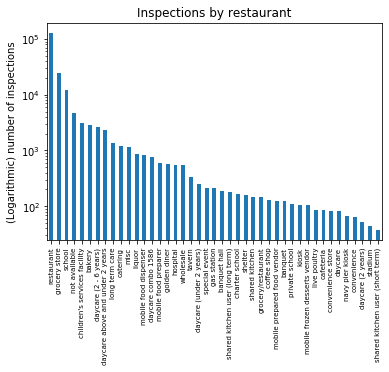

In [80]:
nInspectionsByType.plot.bar()
plt.xticks(fontsize=7)
plt.title("Inspections by (treated) type of facility")
plt.ylabel("(Logarithmic) number of inspections")
plt.yscale('log')
plt.show()

The plot above presents the number of inspections by type of business - one pertinent observation would be that most of the inspections correspond to restaurants.

## Relationship between columns

Let us see how the columns of the dataset are related. 

To start, we will plot the correlations between every pair of columns in order to see how they can be connected to each other.

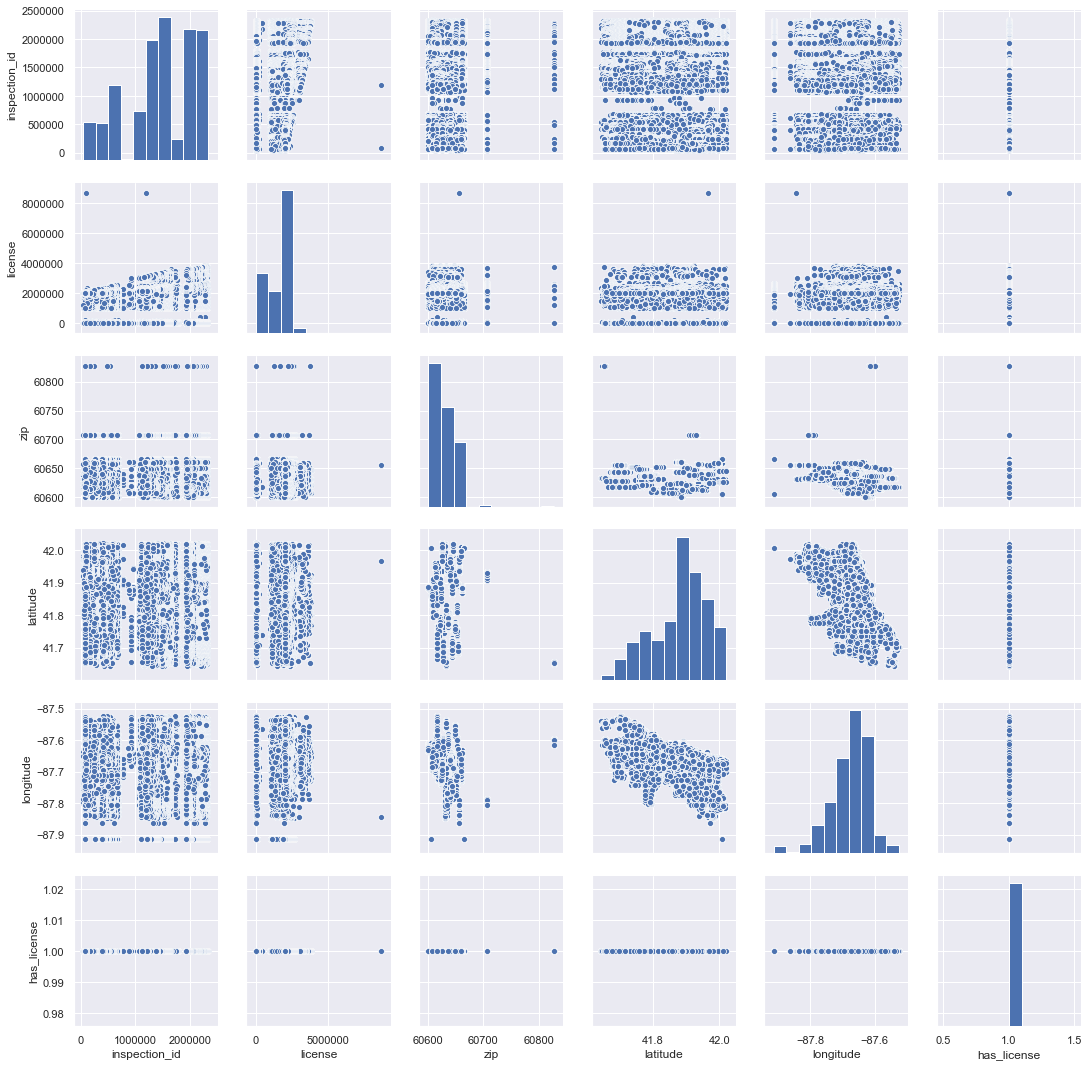

In [81]:
sns.set()
sns.pairplot(chicago_df_noNan.dropna())
plt.show()

From the previous plot, we can extract some interesting results:
- The plot (`Latitude`, `Longitude`) gives us a sense of the city's shape, as it becomes a plot of the data points in space (for comparison, an map of the can also be found further bellow). Furthermore, both `Longitude` and `Latitude` are approximately naturally distributed in their value range. 
- The `Zip` address is concentrated at 60000, which is not surprising as Chicago's zip codes are concentrated at around 60600. The histogram plot easily evidencies the presence of at least two outliers, due to it's unexpected x-axis value range - these may be restaurants in the outskirts of the city.
- We would expect a uniform distribution for the `Inspection ID`, but the plotted histogram may reflect a national-scale license attribution system.
- Finally, inspections seem to be pretty uniformly dispersed throughout the different `License #` values, whose histogram also evidencies one outlier.

After looking at this plot, we may ask which of these variable are linearly correlated. And this is the next question we are going to answer from our dataset.

## Where are the inspections located?

Previously, we saw the plot of `('Latitude', 'Longitude')` already creates a basic map with the location of the businesses within the city.

Let's formalize this map and understand better where the businesses subject to inspections are located

In [87]:
# New DataFrame with the zip codes and #inspections per zip code
businessesByZip = chicago_df_noNan.groupby('zip')[['inspection_id']].count()
businessesByZip = businessesByZip.rename(columns={'inspection_id':'nInspections'})
businessesByZip.reset_index(inplace=True)
businessesByZip['zip'] = businessesByZip['zip'].astype(int).astype('str')
businessesByZip.head(3)

,zip,nInspections
0,60153,15
1,60155,1
2,60302,5


In [90]:
m = folium.Map(location=[41.8781, -87.6298])
zip_geo = f'./data/zipCodesBoundaries.geojson'

folium.Choropleth(
    geo_data=zip_geo,
    name='choropleth',
    data=businessesByZip,
    columns=['zip','nInspections'],
    key_on='feature.properties.zip',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Businesses per zip'
).add_to(m)

folium.LayerControl().add_to(m)

m

This map contains the number of inspections made by zip code area, and reflects how the majority of inspections are located in downtown Chicago